## 原始数据概览

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

### 原始数据说明

数据集包含了9个字段，分别是：
1. company：公司名称（3135个非空值）
2. location：公司总部的地点 Location of company headquarters（3134个非空值）
3. industry：行业（3134个非空值）
4. total_laid_off：总裁员人数（2095个非空值，数据类型为浮点数）
5. percentage_laid_off：裁员百分比（2034个非空值，数据类型为浮点数）
6. date：日期（3135个非空值）
7. stage：公司阶段   Stage of funding（3128个非空值）
8. country：国家（3135个非空值）
9. funds_raised：筹集资金  Funds raised by the company (in Millions $)（2809个非空值，数据类型为浮点数）

In [2]:
df = pd.read_csv('/Users/amadeus/python_projects/data_mining/layoffs.csv')
# 数据集样例
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Karat Financial,Los Angeles,Finance,NaN,NaN,2023-10-27,Series B,United States,116.0
1,Hippo Insurance,SF Bay Area,Finance,120.0,0.2,2023-10-26,Post-IPO,United States,1300.0
2,Graphy,Bengaluru,Education,50.0,0.2,2023-10-26,Subsidiary,India,NaN
3,Salsify,Boston,Retail,110.0,NaN,2023-10-25,Unknown,United States,453.0
4,F-Secure,Helsinki,Security,70.0,NaN,2023-10-25,Post-IPO,Finland,NaN


In [3]:
# 数据集维度
df.shape

(3135, 9)

In [4]:
# 数据集统计信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              3135 non-null   object 
 1   location             3134 non-null   object 
 2   industry             3134 non-null   object 
 3   total_laid_off       2095 non-null   float64
 4   percentage_laid_off  2034 non-null   float64
 5   date                 3135 non-null   object 
 6   stage                3128 non-null   object 
 7   country              3135 non-null   object 
 8   funds_raised         2809 non-null   float64
dtypes: float64(3), object(6)
memory usage: 220.6+ KB


In [5]:
df['date'].max()

'2023-10-27'

In [6]:
df['location'].value_counts().head(30)

location
SF Bay Area        785
New York City      319
Boston             144
Bengaluru          130
Los Angeles        115
Seattle            109
London             103
Berlin              74
Tel Aviv            72
Sao Paulo           67
Toronto             67
Austin              49
Sydney              45
Chicago             45
Singapore           44
Jakarta             35
Mumbai              33
Gurugram            30
Salt Lake City      29
Washington D.C.     28
Denver              26
Stockholm           25
Atlanta             24
Vancouver           22
San Diego           21
Portland            20
Melbourne           20
Montreal            20
Lagos               19
New Delhi           19
Name: count, dtype: int64

### 原始数据可视化

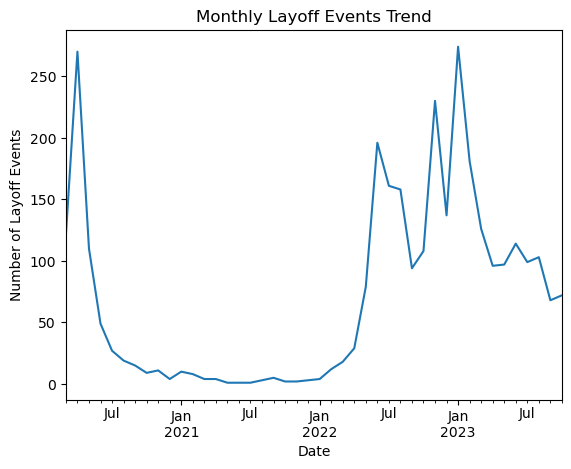

In [7]:
import matplotlib.pyplot as plt

# 将日期转换为日期时间格式
df['date'] = pd.to_datetime(df['date'])

# 按月重新采样并绘制图表
df.set_index('date').resample('M').size().plot()

# 添加标题和轴标签
plt.title('Monthly Layoff Events Trend')
plt.xlabel('Date')
plt.ylabel('Number of Layoff Events')

# 显示图表
plt.show()

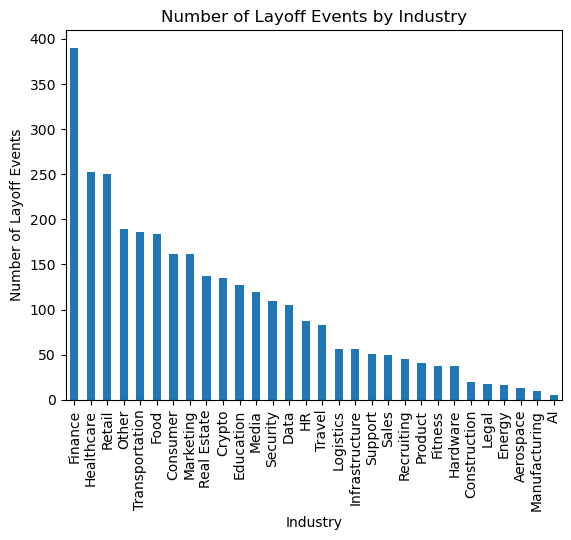

In [8]:
# 统计不同行业的裁员事件数量，并绘制条形图
df['industry'].value_counts().plot(kind='bar')

# 添加图表标题
plt.title('Number of Layoff Events by Industry')

# 添加x轴和y轴标签
plt.xlabel('Industry')
plt.ylabel('Number of Layoff Events')

# 显示图表
plt.show()


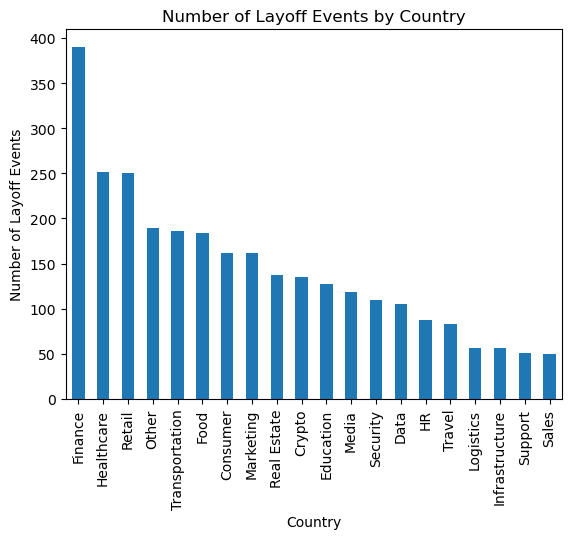

In [9]:
# 统计不同国家的裁员事件数量，并绘制条形图

industry_layoffs = df['industry'].value_counts()

# 选出前 20 个行业
top_20_industries = industry_layoffs.head(20)

# 绘制条形图
top_20_industries.plot(kind='bar')  

# 添加图表标题
plt.title('Number of Layoff Events by Country')

# 添加x轴和y轴标签
plt.xlabel('Country')
plt.ylabel('Number of Layoff Events')

# 显示图表
plt.show()

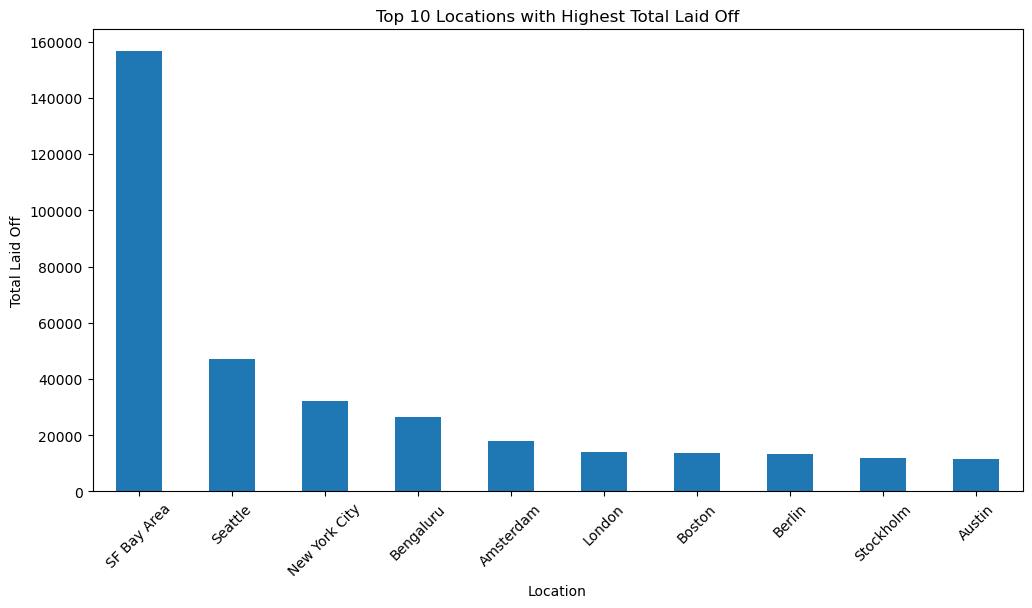

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_data = df.groupby('location')['total_laid_off'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 6))  # 设置图形大小
grouped_data.plot(kind='bar')  # 绘制条形图
plt.xlabel('Location')  # 设置 x 轴标签
plt.ylabel('Total Laid Off')  # 设置 y 轴标签
plt.title('Top 10 Locations with Highest Total Laid Off')  # 设置标题
plt.xticks(rotation=45)  # 将 x 轴标签旋转，以便更好地显示
plt.show()  # 显示图形


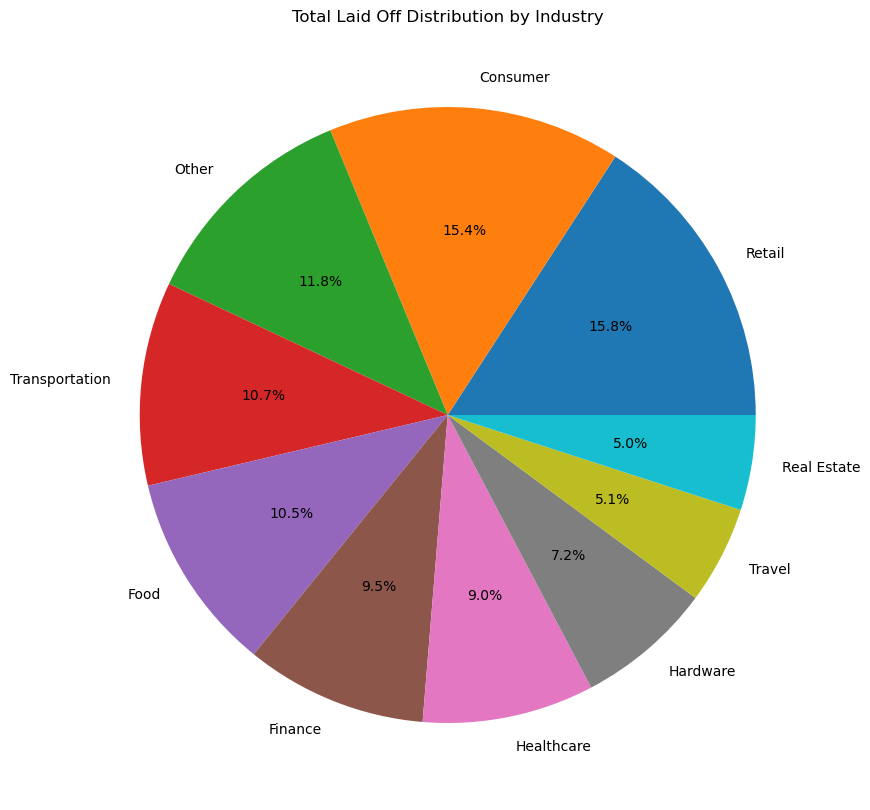

In [11]:
grouped_industry = df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 10))  # 设置图形大小
grouped_industry.plot(kind='pie', autopct='%1.1f%%')  # 绘制饼图，显示百分比
plt.title('Total Laid Off Distribution by Industry')  # 设置标题
plt.ylabel('')  # 隐藏 y 轴标签
plt.show()  # 显示图形


## 数据预处理

### 重复值分析

#### 重复值表

In [12]:
df[df.duplicated()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
2269,Cazoo,London,Transportation,750.0,0.15,2022-06-07,Post-IPO,United Kingdom,2000.0


#### 删除重复值

In [13]:
df = df[~df.duplicated()]

### 缺失值处理

#### 缺失值表

In [14]:
# 提供有关列类型和空值数量的一些信息
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'字段类型'})

tab_info = pd.concat([
    tab_info,
    pd.DataFrame(df.isnull().sum()).T.rename(index={0:'空值量(nb)'}),
    pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'空值率(%)'})
])

display(tab_info)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
字段类型,object,object,object,float64,float64,datetime64[ns],object,object,float64
空值量(nb),0,1,1,1040,1101,0,7,0,326
空值率(%),0.0,0.031908,0.031908,33.184429,35.130823,0.0,0.223357,0.0,10.402042


In [15]:
# Checks for missing values in columns: industry and stage
df[df['industry'].isnull() | 
          df['stage'].isnull()
]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
87,Appsmith,SF Bay Area,NaN,35.0,0.25,2023-09-22,Series B,United States,51.0
999,Soundwide,Berlin,Other,NaN,0.08,2023-01-27,NaN,Germany,NaN
1154,Verily,SF Bay Area,Healthcare,250.0,0.15,2023-01-11,NaN,United States,3500.0
1176,Relevel,Bengaluru,HR,40.0,0.20,2023-01-10,NaN,India,NaN
1605,Advata,Seattle,Healthcare,32.0,0.21,2022-10-28,NaN,United States,NaN
1611,Spreetail,Austin,Retail,NaN,NaN,2022-10-27,NaN,United States,NaN
1959,Gatherly,Atlanta,Marketing,NaN,0.50,2022-07-31,NaN,United States,NaN
2342,Zapp,London,Food,NaN,0.10,2022-05-25,NaN,United Kingdom,300.0


#### 删除缺失值方法
todo：分析一下怎么删

比如是直接删，还是替换

比如裁员人数为空但是百分比不为空的，是否可以计算出人数

比如是直接取平均值还是什么之类的

一个可以参考的分析样例：
缺失数据不限于特定行或列， 但是大部分缺失值主要集中在这三列中：
1. total_laid_off
2. percentage_laid_off
3. funds_raised.

关键数据： 要确定一列是否对分析至关重要，让我们重温一下标题/目标： 洞察科技公司的裁员情况。既然我们已经明确了目标，我们就知道 "total_laid_off "列对分析至关重要，因为我们只对裁员的公司感兴趣。虽然缺失的值可能代表零裁员，但我们现在还不能确定。因此，我们将继续删除 "total_laid_off "列值为 NA 的行。

In [16]:
# 1. 选择目标变量
main_label = 'percentage_laid_off'

# 2. 移除目标变量缺失值的行
df = df[~df[main_label].isnull()]
df = df[~df['location'].isnull()]
df = df[~df['industry'].isnull()]
df = df[~df['stage'].isnull()]
df = df.fillna(0)

# 3. 重新缩放目标变量, 
df[main_label] = df[main_label] * 100 # 将 Percentage 列的值乘以100。这通常是为了将比例转换为百分比形式

df.isnull().sum()

company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  0
country                0
funds_raised           0
dtype: int64

### 异常值处理

### 预处理结果

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2025 entries, 1 to 3133
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              2025 non-null   object        
 1   location             2025 non-null   object        
 2   industry             2025 non-null   object        
 3   total_laid_off       2025 non-null   float64       
 4   percentage_laid_off  2025 non-null   float64       
 5   date                 2025 non-null   datetime64[ns]
 6   stage                2025 non-null   object        
 7   country              2025 non-null   object        
 8   funds_raised         2025 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 158.2+ KB


In [18]:
df.describe()    # 计算并展示数值型数据的统计值
# df['date'] = df['date'].astype(str)
# df.info()

,total_laid_off,percentage_laid_off,date,funds_raised
count,2025.000000,2025.000000,2025,2025.000000
mean,199.358519,27.266049,2022-05-28 12:30:56.000000256,587.820571
min,0.000000,0.000000,2020-03-12 00:00:00,0.000000
25%,0.000000,10.000000,2022-05-23 00:00:00,30.000000
50%,50.000000,17.000000,2022-11-01 00:00:00,137.000000
75%,130.000000,30.000000,2023-02-13 00:00:00,399.000000
max,12000.000000,100.000000,2023-10-26 00:00:00,121900.000000
std,733.514006,27.433404,NaN,4168.153163


In [19]:
df.isnull().sum()

company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  0
country                0
funds_raised           0
dtype: int64

## 裁员预测模型

### 模型的建立

#### 决策树

下面的代码的目的是将 DataFrame 的列分为数值型和分类型两类，方便后续的数据分析和处理。

这里不考虑使用独热编码（One-Hot Encoding），因为独热编码会显著增加数据集的大小，因为它为每个独特的类别值创建新列。

我们有很多独特值，这会导致“维度爆炸”问题

In [20]:
# 区分出数值型列和分类型列
numerical_cols = df._get_numeric_data().columns  # 数值型列
categorical_cols = list(set(df.columns)-set(numerical_cols))  # 分类型列
categorical_cols

['industry', 'country', 'company', 'location', 'stage', 'date']

In [21]:
# 去除 date 和 company 列
df_new = df.drop('date', axis =1)
df_new = df_new.drop("company", axis = 1) 
df_new

,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised
1,SF Bay Area,Finance,120.0,20.0,Post-IPO,United States,1300.0
2,Bengaluru,Education,50.0,20.0,Subsidiary,India,0.0
5,Bengaluru,Retail,20.0,33.0,Series A,India,0.0
6,SF Bay Area,Security,0.0,20.0,Series F,United States,391.0
7,Dallas,Logistics,0.0,100.0,Series B,United States,76.0
...,...,...,...,...,...,...,...
3129,Austin,Support,16.0,100.0,Seed,United States,6.0
3130,Los Angeles,Travel,0.0,100.0,Seed,United States,5.1
3131,Los Angeles,Transportation,8.0,10.0,Unknown,United States,45.0
3132,SF Bay Area,Consumer,6.0,75.0,Seed,United States,1.0


将分类数据转换为数值数据

In [22]:
df_new["stage"].unique()

array(['Post-IPO', 'Subsidiary', 'Series A', 'Series F', 'Series B',
       'Seed', 'Acquired', 'Unknown', 'Series E', 'Series C', 'Series H',
       'Series D', 'Private Equity', 'Series G', 'Series I', 'Series J'],
      dtype=object)

In [23]:
df_new["stage"] = df_new["stage"].replace({
    'Post-IPO': 1, 
    'Subsidiary': 2, 
    'Series A': 3, 
    'Series F': 4, 
    'Series B': 5,
    'Seed': 6, 
    'Acquired': 7, 
    'Unknown': 8, 
    'Series E': 9, 
    'Series C': 10, 
    'Series H': 11,
    'Series D': 12, 
    'Private Equity': 13, 
    'Series G': 14, 
    'Series I': 15, 
    'Series J': 16
})


df_new["stage"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [24]:
df_new['country'].unique()

array(['United States', 'India', 'United Kingdom', 'Canada', 'France',
       'Netherlands', 'Sweden', 'Germany', 'Brazil', 'Czech Republic',
       'Estonia', 'Kenya', 'Indonesia', 'Israel', 'Norway', 'Spain',
       'Nigeria', 'New Zealand', 'Luxembourg', 'Ireland', 'Australia',
       'Mexico', 'Singapore', 'South Korea', 'China', 'Poland', 'Chile',
       'Saudi Arabia', 'Switzerland', 'Austria', 'Italy', 'Finland',
       'Seychelles', 'Argentina', 'Colombia', 'Egypt', 'Denmark',
       'Malaysia', 'Hungary', 'Vietnam', 'Hong Kong', 'Thailand',
       'Senegal', 'Pakistan', 'United Arab Emirates', 'Turkey', 'Russia',
       'Bulgaria', 'Portugal', 'Myanmar'], dtype=object)

In [25]:
country_mapping = {
    'United States': 1, 'India': 2, 'United Kingdom': 3, 'Canada': 4, 'France': 5,
    'Netherlands': 6, 'Sweden': 7, 'Germany': 8, 'Brazil': 9, 'Czech Republic': 10,
    'Estonia': 11, 'Kenya': 12, 'Indonesia': 13, 'Israel': 14, 'Norway': 15,
    'Spain': 16, 'Nigeria': 17, 'New Zealand': 18, 'Luxembourg': 19, 'Ireland': 20,
    'Australia': 21, 'Mexico': 22, 'Singapore': 23, 'South Korea': 24, 'China': 25,
    'Poland': 26, 'Chile': 27, 'Saudi Arabia': 28, 'Switzerland': 29, 'Austria': 30,
    'Italy': 31, 'Finland': 32, 'Seychelles': 33, 'Argentina': 34, 'Colombia': 35,
    'Egypt': 36, 'Denmark': 37, 'Malaysia': 38, 'Hungary': 39, 'Vietnam': 40,
    'Hong Kong': 41, 'Thailand': 42, 'Senegal': 43, 'Pakistan': 44, 'United Arab Emirates': 45,
    'Turkey': 46, 'Russia': 47, 'Bulgaria': 48, 'Portugal': 49, 'Myanmar': 50
}

df_new['country'] = df_new['country'].replace(country_mapping)
df_new['country'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [26]:
df_new["industry"].unique()

array(['Finance', 'Education', 'Retail', 'Security', 'Logistics',
       'Hardware', 'Consumer', 'Crypto', 'Healthcare', 'Sales', 'Data',
       'Other', 'Construction', 'Transportation', 'Recruiting', 'AI',
       'Travel', 'Food', 'Media', 'Product', 'Marketing', 'Real Estate',
       'Manufacturing', 'HR', 'Energy', 'Aerospace', 'Fitness',
       'Infrastructure', 'Support', 'Legal'], dtype=object)

In [27]:
industry_mapping = {
    'Finance': 1, 'Education': 2, 'Retail': 3, 'Security': 4, 'Logistics': 5,
    'Hardware': 6, 'Consumer': 7, 'Crypto': 8, 'Healthcare': 9, 'Sales': 10,
    'Data': 11, 'Other': 12, 'Construction': 13, 'Transportation': 14, 'Recruiting': 15,
    'AI': 16, 'Travel': 17, 'Food': 18, 'Media': 19, 'Product': 20,
    'Marketing': 21, 'Real Estate': 22, 'Manufacturing': 23, 'HR': 24, 'Energy': 25,
    'Aerospace': 26, 'Fitness': 27, 'Infrastructure': 28, 'Support': 29, 'Legal': 30
}

df_new["industry"] = df_new["industry"].replace(industry_mapping)
df_new["industry"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [28]:
df_new["location"].unique()

array(['SF Bay Area', 'Bengaluru', 'Dallas', 'Birmingham', 'London',
       'New York City', 'Seattle', 'Boston', 'Calgary', 'Paris',
       'Amsterdam', 'Stockholm', 'Kansas City', 'San Diego',
       'Los Angeles', 'Salt Lake City', 'Montreal', 'Washington D.C.',
       'Raleigh', 'Berlin', 'Edinburgh', 'Saskatoon', 'Denver',
       'Belo Horizonte', 'Portland', 'Chicago', 'Brno', 'Mumbai',
       'Tallinn', 'Nairobi', 'Jakarta', 'Kolkata', 'Gurugram',
       'Indianapolis', 'Santa Barbara', 'Tel Aviv', 'Atlanta', 'Sandnes',
       'Barcelona', 'Toronto', 'Lagos', 'Sao Paulo', 'Auckland',
       'Luxembourg', 'Lexington', 'Phoenix', 'Tampa Bay', 'Austin',
       'Dublin', 'Miami', 'Chennai', 'St. Louis', 'Sydney', "Ra'anana",
       'Mexico City', 'Detroit', 'Singapore', 'Seoul', 'Melbourne',
       'Baltimore', 'Vancouver', 'Charlottesville', 'Kfar Saba',
       'Hangzhou', 'Krakow', 'Houston', 'Philadelphia', 'Las Vegas',
       'Santiago', 'Brisbane', 'Ottawa', 'Riyadh', 'Wrocław'

In [29]:
# 为每个唯一的位置分配一个唯一的数字
location_mapping = {location: idx for idx, location in enumerate(df_new["location"].unique())}

# 替换 'location' 列中的文本值为相应的数字
df_new["location"] = df_new["location"].replace(location_mapping)
df_new["location"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172])

In [30]:
df_new["location"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172])

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2025 entries, 1 to 3133
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location             2025 non-null   int64  
 1   industry             2025 non-null   int64  
 2   total_laid_off       2025 non-null   float64
 3   percentage_laid_off  2025 non-null   float64
 4   stage                2025 non-null   int64  
 5   country              2025 non-null   int64  
 6   funds_raised         2025 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 126.6 KB


In [32]:
df_new

,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised
1,0,1,120.0,20.0,1,1,1300.0
2,1,2,50.0,20.0,2,2,0.0
5,1,3,20.0,33.0,3,2,0.0
6,0,4,0.0,20.0,4,1,391.0
7,2,5,0.0,100.0,5,1,76.0
...,...,...,...,...,...,...,...
3129,47,29,16.0,100.0,6,1,6.0
3130,14,17,0.0,100.0,6,1,5.1
3131,14,14,8.0,10.0,8,1,45.0
3132,0,7,6.0,75.0,6,1,1.0


##### 模型训练

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

# 机器学习模型的输入特征 x 和目标变量 y。
y = df_new['percentage_laid_off'].values.reshape(-1).astype('int')
X = df_new.drop("percentage_laid_off", axis =1)
print(y.dtype)

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

int64
(2025, 6)
(2025,)
(1620, 6)
(405, 6)
(1620,)
(405,)


In [34]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
#plt.figure(figsize = (25,10))
#plot_tree(dt)
#plt.title("decision tree", fontsize = 25)

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_pred = dt.predict(X_test)

# 计算并打印 RMSE 分数
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

RMSE:  32.07633641837377


#### 随机森林回归

In [37]:
rand = RandomForestRegressor()
rand.fit(X_train, y_train)
y_pred_rand = rand.predict(X_test)

# 计算并打印 RMSE 分数
rmse = sqrt(mean_squared_error(y_test, y_pred_rand))
print("RMSE: ", rmse)

RMSE:  23.745901511395367


#### 支持向量回归

In [38]:
from sklearn.svm import SVR

# 2. 创建并训练 SVR 模型
svr = SVR()  # 创建 SVR 实例
svr.fit(X_train, y_train)  # 训练模型

# 使用模型进行预测
y_pred_svr = svr.predict(X_test)  # 对测试数据进行预测

# 评估模型性能
rmse_svr = sqrt(mean_squared_error(y_test, y_pred_svr))  # 计算 RMSE
print("RMSE for SVR: ", rmse_svr)

RMSE for SVR:  29.229602622012642


#### 神经网络回归

In [39]:
from sklearn.neural_network import MLPRegressor

# 创建并训练 MLPRegressor 模型
# hidden_layer_sizes 定义了隐藏层的大小（含有 100 个神经元的单个隐藏层），max_iter 定义了最大迭代次数，activation 和 solver 是用于激活函数和优化器的选择
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, activation='relu', solver='adam', random_state=1)  # 创建 MLPRegressor 实例
mlp.fit(X_train, y_train)  # 训练模型

# 使用模型进行预测
y_pred_mlp = mlp.predict(X_test)  # 对测试数据进行预测

# 评估模型性能
rmse_mlp = sqrt(mean_squared_error(y_test, y_pred_mlp))  # 计算 RMSE
print("RMSE for MLPRegressor: ", rmse_mlp)

RMSE for MLPRegressor:  29.475429835479016


### 模型的改进

#### 缺失值处理方法2
下面这段代码对原始数据集进行了一系列预处理步骤，包括去除目标变量的缺失值、数据筛选、缩放、填充缺失值、类别编码以及删除不相关的列，目的是为了使数据集更适合于进一步的数据分析或机器学习模型训练。

In [40]:
import shap
import matplotlib.pyplot as plt
from catboost import Pool, CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from feature_engine.encoding import RareLabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import re
from tqdm import tqdm

df = pd.read_csv('/Users/amadeus/python_projects/data_mining/layoffs.csv')

# 1. 选择目标变量
main_label = 'percentage_laid_off'

# 2. 移除目标变量缺失值的行
df = df[~df[main_label].isnull()]

# 3. 重新缩放目标变量, 
df[main_label] = df[main_label] * 100 # 将 Percentage 列的值乘以100。这通常是为了将比例转换为百分比形式

# 4. 筛选特定日期之后的数据
df = df[df['date'] >= '2022-01-01']

# 5. 对特定列应用稀有标签编码器
for col in ['location', 'industry', 'stage','country']:   # 对 location、industry 和 stage 三个列进行操作
    df[col] = df[col].fillna('Other')    # 填充这些列的缺失值
    encoder = RareLabelEncoder(n_categories=1, max_n_categories=150, replace_with='Other', tol=15/df.shape[0]) # 创建一个 RareLabelEncoder 对象，这是一个用于处理稀有类别的编码器。它限制类别数量（max_n_categories=50），并将出现频率低于某一阈值（tol）的类别替换为 'Other'
    df[col] = encoder.fit_transform(df[[col]])   # 使用这个编码器对每列进行转换

# 6. 删除不需要的列
cols2drop = ['total_laid_off', 'date', 'company']
df = df.drop(cols2drop, axis=1)

print(df.shape)
df.head()

(1596, 6)


,location,industry,percentage_laid_off,stage,country,funds_raised
1,SF Bay Area,Finance,20.0,Post-IPO,United States,1300.0
2,Bengaluru,Education,20.0,Other,India,NaN
5,Bengaluru,Retail,33.0,Series A,India,NaN
6,SF Bay Area,Security,20.0,Series F,United States,391.0
7,Other,Logistics,100.0,Series B,United States,76.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1596 entries, 1 to 2455
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location             1596 non-null   object 
 1   industry             1596 non-null   object 
 2   percentage_laid_off  1596 non-null   float64
 3   stage                1596 non-null   object 
 4   country              1596 non-null   object 
 5   funds_raised         1430 non-null   float64
dtypes: float64(2), object(4)
memory usage: 87.3+ KB


#### 变量选取与数据划分

下面的代码是机器学习项目中的典型数据准备阶段。

它涵盖了从原始数据集提取目标变量和特征变量、识别分类特征、划分数据为训练集和测试集等步骤

为接下来的模型训练和评估做好准备。

In [42]:
# 1. 初始化数据
y = df[main_label].values.reshape(-1,)  # 目标变量 y  是由 main_label（之前定义的目标列名'percentage_laid_off'）指定的列转换为的一维数组
X = df.drop([main_label], axis=1)   # 特征变量 X   是从原始数据集 df 中删除目标列后得到的DataFrame。

In [43]:
# 2. 识别分类列
cat_cols = X.select_dtypes(include=['object']).columns   # 识别了 X 中所有数据类型为 object 的列（通常是字符串或类别数据），并将这些列名存储在 cat_cols 中
print(cat_cols)

Index(['location', 'industry', 'stage', 'country'], dtype='object')


In [44]:
# 3. 获取分类列的索引
cat_cols_idx = [list(X.columns).index(c) for c in cat_cols]  # 计算了 cat_cols 中每个列名在 X 中的索引位置。这对于某些需要列索引的机器学习算法很有用（比如处理分类特征的算法）
cat_cols_idx

[0, 1, 2, 3]

In [45]:
# 4. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=83, stratify=df[['stage']])
# 使用 train_test_split 函数将数据集分为训练集和测试集。
# 参数 test_size=0.5 表示测试集占总数据的一半。
# random_state=83 用于确保每次运行代码时都得到相同的分割结果。
# stratify=df[['stage']] 意味着分割数据时将保持 Stage 列的类别分布一致

In [46]:
# 5. 输出训练集和测试集的维度
print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)
# 输出了训练集和测试集的维度（即每个集合中的行数和列数），以便确认数据被正确划分

(798, 5) (798, 5)
(798,) (798,)


#### CatBoost 模型

下面的代码将使用 CatBoost 进行机器学习模型的训练和评估的过程。

CatBoost 是一个流行的梯度提升库，尤其适用于处理具有分类特征的数据。

演示了使用 CatBoost 模型进行回归分析的完整流程，包括数据的准备、模型的训练、预测以及性能评估。通过比较训练集和测试集的 RMSE 分数，可以评估模型的性能和泛化能力。

In [47]:
# 1. 初始化 Pool
train_pool = Pool(X_train, y_train, cat_features=cat_cols_idx)  # 用于训练数据 (X_train, y_train) 
test_pool = Pool(X_test, y_test, cat_features=cat_cols_idx)  # 用于测试数据 (X_test, y_test)

Pool 是 CatBoost 用于处理数据的格式，它可以更有效地管理大型数据集和分类特征。

cat_features=cat_cols_idx 指定了分类特征的索引，让 CatBoost 知道哪些列是分类数据。

In [48]:
# 2. 指定训练参数并初始化模型
model = CatBoostRegressor(   # 初始化了一个 CatBoost 回归模型
    iterations=100,    # 训练的迭代次数
    depth=5,   # 树的深度
    learning_rate=0.04,   # 学习率
    verbose=0,  # 在训练过程中不打印详细的信息
    loss_function='RMSE'  # 指定了使用均方根误差（RMSE）作为损失函数
)

In [49]:
# 3. 训练模型
model.fit(train_pool)    # 在 train_pool 数据上训练模型。

In [50]:
# 4. 使用模型进行预测
y_train_pred = model.predict(train_pool)  # 使用训练好的模型对训练集进行预测。
y_test_pred = model.predict(test_pool)   # 使用训练好的模型对测试集进行预测。

In [51]:
# 5. 计算并打印 RMSE 分数
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)


from math import sqrt
print("rmse_train: ", sqrt(rmse_train))
print("rmse_test: ", sqrt(rmse_test))

# 计算了训练集 (y_train) 和测试集 (y_test) 的预测值与实际值之间的均方根误差（RMSE）
print(f"RMSE score for train {round(rmse_train,2)} percentage points, and for test {round(rmse_test,2)} percentage points")

from sklearn.metrics import mean_absolute_error, r2_score

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"MAE for train: {mae_train}, for test: {mae_test}")
print(f"R2 score for train: {r2_train}, for test: {r2_test}")

rmse_train:  4.750426322422513
rmse_test:  4.78409701726839
RMSE score for train 22.57 percentage points, and for test 22.89 percentage points
MAE for train: 15.801130131880313, for test: 15.90979868380675
R2 score for train: 0.34116396568540985, for test: 0.23225505588236572


#### 网格搜索调参
Grid Search：一种调参手段；穷举搜索：在所有候选的参数选择中，通过循环遍历，尝试每一种可能性，表现最好的参数就是最终的结果。其原理就像是在数组里找最大值。

对训练集再进行一次划分，分成训练集和验证集，这样划分的结果就是：原始数据划分为3份，分别为：训练集、验证集和测试集；

其中训练集用来模型训练，验证集用来调整参数，而测试集用来衡量模型表现好坏。

In [52]:
from catboost import CatBoostRegressor, Pool, cv

# 创建 Pool
X_train_vali, X_test, y_train_vali, y_test = train_test_split(X, y, test_size=0.5, random_state=83, stratify=df[['stage']])
X_train, X_vali, y_train, y_vali = train_test_split(X_train_vali, y_train_vali, test_size=0.5)

print(X_train_vali.shape, X_train.shape,  X_vali.shape, X_test.shape)
print(y_train_vali.shape, y_train.shape,  y_vali.shape, y_test.shape)


train_vali_pool = Pool(X_train_vali, y_train_vali, cat_features=cat_cols_idx)  # 用于训练数据
train_pool = Pool(X_train, y_train, cat_features=cat_cols_idx)  # 用于训练数据
vali_pool = Pool(X_vali, y_vali, cat_features=cat_cols_idx)  # 用于验证数据
test_pool = Pool(X_test, y_test, cat_features=cat_cols_idx)  # 用于测试数据

# 定义参数网格
param_grid = {
    'iterations': [50, 100, 200, 300],
    'depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.03, 0.04, 0.05, 0.06]
}


best_score = 1000

# 进行网格搜索
for depth in param_grid['depth']:
    for iterations in param_grid['iterations']:
        for learning_rate in param_grid['learning_rate']:
            model = CatBoostRegressor(
                iterations=iterations, 
                depth=depth, 
                learning_rate=learning_rate,
                loss_function='RMSE',
                verbose=0
            )
            model.fit(train_pool)    # 在 train_pool 数据上训练模型。
            y_vali_pred = model.predict(vali_pool)   # 使用训练好的模型对验证集进行预测。
            rmse_test = mean_squared_error(y_vali, y_vali_pred, squared=False)
            # 计算训练集 (y_train) 和验证集 (y_vali) 的预测值与实际值之间的均方根误差（RMSE）
            score = round(rmse_test,2)
            if score < best_score:#找到表现最好的参数
                best_score = score
                best_parameters = {'depth':depth,'iterations':iterations,'learning_rate':learning_rate}
            
####   grid search end
print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))


(798, 5) (399, 5) (399, 5) (798, 5)
(798,) (399,) (399,) (798,)
Best score:23.36
Best parameters:{'depth': 4, 'iterations': 100, 'learning_rate': 0.06}


In [53]:
train_pool = train_vali_pool
X_train = X_train_vali
y_train = y_train_vali

model = CatBoostRegressor(   # 初始化了一个 CatBoost 回归模型
    iterations= best_parameters['iterations'],    # 训练的迭代次数
    depth=best_parameters['depth'],   # 树的深度
    learning_rate=best_parameters['learning_rate'],   # 学习率
    verbose=0,  # 在训练过程中不打印详细的信息
    loss_function='RMSE'  # 指定了使用均方根误差（RMSE）作为损失函数
)

model.fit(train_pool)    # 在 train_pool 数据上训练模型。

y_train_pred = model.predict(train_pool)  # 使用训练好的模型对训练集进行预测。
y_test_pred = model.predict(test_pool)   # 使用训练好的模型对测试集进行预测。

# 5. 计算并打印 RMSE 分数
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)


from math import sqrt
print("rmse_train: ", sqrt(rmse_train))
print("rmse_test: ", sqrt(rmse_test))

# 计算了训练集 (y_train) 和测试集 (y_test) 的预测值与实际值之间的均方根误差（RMSE）
print(f"RMSE score for train {round(rmse_train,2)} percentage points, and for test {round(rmse_test,2)} percentage points")

rmse_train:  4.754363931970215
rmse_test:  4.773215187415653
RMSE score for train 22.6 percentage points, and for test 22.78 percentage points


在机器学习领域，准确率（Accuracy）通常用于分类问题，而均方根误差（RMSE）则用于回归问题。

由于 RMSE 是衡量回归预测准确性的指标，它不适用于计算准确率，因为准确率是指预测正确的数量占总数量的比例，通常用于评估分类模型的性能。

我们使用的是 CatBoostRegressor，正在处理的是一个回归问题，而不是分类问题。回归问题的目的是预测连续值，而不是将实例分配到特定类别（这是分类的目标）。

除了 RMSE，还有其他一些衡量回归模型性能的指标，例如：

平均绝对误差（Mean Absolute Error, MAE）：这是预测值和实际值之差的绝对值的平均。
R² 分数：这是一个统计指标，用于衡量模型对变异性的解释程度。R² 分数越接近 1，模型的性能通常认为越好。

在处理回归问题时，通常会结合多个指标来全面评估模型的性能。

这两个指标的计算如下

In [54]:
from sklearn.metrics import mean_absolute_error, r2_score

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"MAE for train: {mae_train}, for test: {mae_test}")
print(f"R2 score for train: {r2_train}, for test: {r2_test}")

MAE for train: 15.83056310131085, for test: 15.810944543771726
R2 score for train: 0.3389768218820626, for test: 0.23921646039229383


下面的代码将使用 SHAP（SHapley Additive exPlanations）库来解释之前训练的模型（CatBoostRegressor）做出的预测，展示不同特征如何影响模型的预测结果。

这种类型的分析对于理解模型决策的驱动因素以及评估模型的可解释性和公平性非常有用。

In [55]:
# 1. 初始化 JavaScript 可视化环境
shap.initjs()

# 2. 创建 SHAP 解释器
ex = shap.TreeExplainer(model)   # 专门用于解释基于树的模型（如随机森林、梯度提升树等）

使用 TreeExplainer 对象 ex 计算测试集 X_test 的 SHAP 值。

SHAP 值表示每个特征对模型每个预测的贡献程度，帮助解释每个特征如何影响模型的每个预测结果。

In [56]:
# 3. 计算 SHAP 值
shap_values = ex.shap_values(X_test)

生成一个 SHAP 总结图，该图展示了对模型预测影响最大的前 30 个特征（由 max_display=30 控制）。

在总结图中，每个点代表一个观察值（一个数据点）。点的位置表示特征对模型预测的影响（SHAP 值），颜色表示特征值的高低。

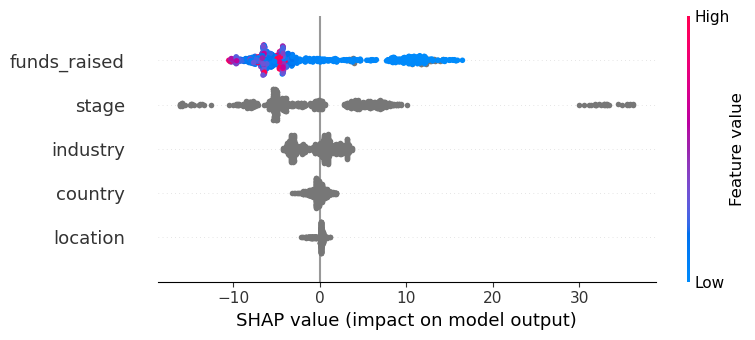

In [57]:
# 4. 绘制 SHAP 总结图
shap.summary_plot(shap_values, X_test, max_display=30)

SHAP 值解释了每个特征对模型预测结果的贡献程度，可以是正面的（增加预测值）或负面的（减少预测值）。以下是如何分析这个图表：

特征重要性：
    图表的垂直轴显示了特征列表，按重要性排序，最重要的特征在顶部。
    在此图中，funds_raised 是最重要的特征，因为它的 SHAP 值分布最宽，这意味着它在模型预测中的作用变化最大。其次是 stage，然后是 industry，以此类推。
    
SHAP 值分布：
    水平轴显示了 SHAP 值，它们表示特征值对模型预测的影响（以模型输出的改变量度量）。
    如果一个点在垂直线的右侧（正值），表示该特征的该值增加了模型的预测值；如果在左侧（负值），表示减少了模型的预测值。
    
颜色编码：
    点的颜色表示特征值的高低。通常，红色表示较高的特征值，蓝色表示较低的特征值。
    例如，对于 funds_raised 特征，较高的值（红色点）可能会减少预测结果（更多的点位于水平线的左侧）。
    
特征值的影响：
    每个特征都会有一群点，每个点代表数据集中一个样本的影响。这些点的水平分布显示了该特征在不同样本上的影响差异。
    特征影响的水平位置分布越广，表示该特征在不同样本上的影响变化越大。
    
总体解释：
    从图表可以看出，funds_raised、stage 和 industry 是对模型输出影响最大的三个特征。
    对于 funds_raised，较高的资金筹集似乎通常导致更低的模型输出值，即高资金筹集数值导致预测的裁员百分比降低

使用 SHAP（SHapley Additive exPlanations）库来提供对模型预测的整体解释，特别是关于模型预测的平均基准值和实际观察到的平均值

In [58]:
# 1. 获取平均基准预测值
expected_values = ex.expected_value # expected_value 是 SHAP 解释器（这里是 ex，一个 TreeExplainer 对象）提供的一个属性，它表示当不考虑任何特征时模型的平均预测值。对于回归问题，它通常是模型输出的平均值

# 2. 打印平均基准预测值
print(f"Average expected probability is {round(expected_values,2)} percentage points")  # 模型在考虑所有可能的特征组合后得出的平均预测值。对于回归模型，这通常是模型预测的平均输出


Average expected probability is 27.07 percentage points


In [59]:
# 3. 计算并打印实际观察到的平均值
print(f"Average actual probability is {round(np.mean(y_test),2)} percentage points") # 计算并打印测试集目标变量 y_test 的平均值。这代表了实际观察到的平均输出值


Average actual probability is 24.73 percentage points


这两个值相当接近，说明模型的整体预测与实际观测值相当吻合。在实际应用中，尤其是在回归问题中，完全精确的匹配是非常罕见的，因此这种程度的接近通常被视为一个良好的预测结果。这表明模型的平均预测水平与实际数据相符，而不是系统性地高估或低估。

下面的代码将生成和显示特定特征对模型预测的影响（即 SHAP 值）的图表，然后遍历 X_test 中的所有列来显示每个特征的影响

用于分析和可视化不同特征对模型预测结果的贡献（SHAP 值）。

它通过详细展示每个特征如何影响模型预测的概率（在这个案例中是裁员概率），为模型的解释性提供了丰富的信息。

这对于理解模型的决策过程以及特定特征对模型预测的重要性

In [62]:
# 展示指定特征对模型预测的影响
def show_shap(col, shap_values=shap_values, label=main_label, X_test=X_test):
    # 复制测试数据
    df_infl = X_test.copy()
    # 计算和添加 SHAP 值
    df_infl['shap_'] = shap_values[:,df_infl.columns.tolist().index(col)]
    # print(df_infl['shap_'].dtype)
    # print(df_infl[col].dtype)
    # print(df_infl[col].unique())
    # 计算平均影响和标准差
    # gain = round(df_infl.groupby(col).mean()['shap_'],4)    注意mean()的顺序  否则会报错
    gain = round(df_infl.groupby(col)['shap_'].mean(), 4)
    # gain_std = round(df_infl.groupby(col).std()['shap_'],4)   注意std()的顺序  否则会报错
    gain_std = round(df_infl.groupby(col)['shap_'].std(),4)
    # 计算每个特征值在测试集中出现的次数
    cnt = df_infl.groupby(col).count()['shap_']
    dd_dict = {'col': list(gain.index), 'gain': list(gain.values), 'gain_std': list(gain_std.values), 'count': cnt}
    # 创建一个 DataFrame df_res，包含特征值、平均 SHAP 值、标准差和出现次数，并按平均 SHAP 值排序
    df_res = pd.DataFrame.from_dict(dd_dict).sort_values('gain', ascending=False).set_index('col')
    # 绘制图表
    plt.figure(figsize=(12,8))
    plt.errorbar(df_res.index, df_res['gain'], yerr=df_res['gain_std'], fmt="o", color="r")
    plt.title(f'SHAP values for column {col}, label {label}')
    plt.ylabel('Layoff probability, percentage points')
    plt.tick_params(axis="x", rotation=90)
    plt.show();
    print(df_res)
    return


location



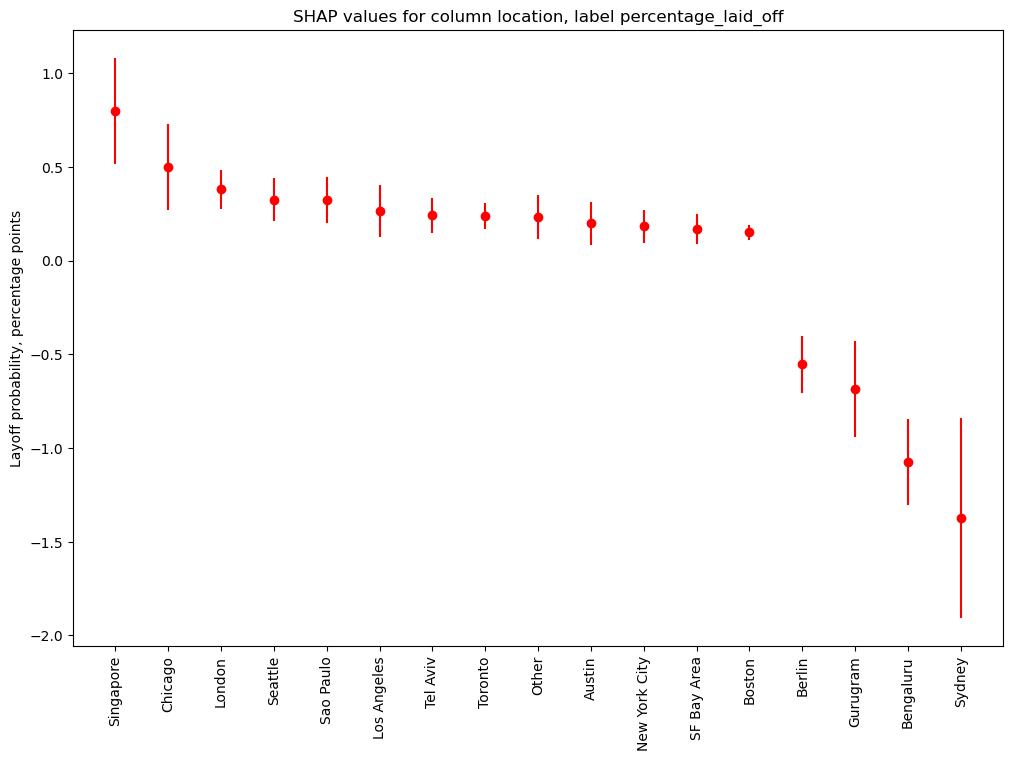

                 gain  gain_std  count
col                                   
Singapore      0.7985    0.2825      8
Chicago        0.4999    0.2274     10
London         0.3798    0.1037     29
Seattle        0.3259    0.1145     25
Sao Paulo      0.3246    0.1223     18
Los Angeles    0.2658    0.1371     29
Tel Aviv       0.2417    0.0931     26
Toronto        0.2362    0.0698     14
Other          0.2335    0.1168    239
Austin         0.1990    0.1159     11
New York City  0.1829    0.0894     99
SF Bay Area    0.1677    0.0815    185
Boston         0.1516    0.0395     29
Berlin        -0.5528    0.1520     23
Gurugram      -0.6835    0.2558      8
Bengaluru     -1.0733    0.2300     32
Sydney        -1.3722    0.5348     13

industry



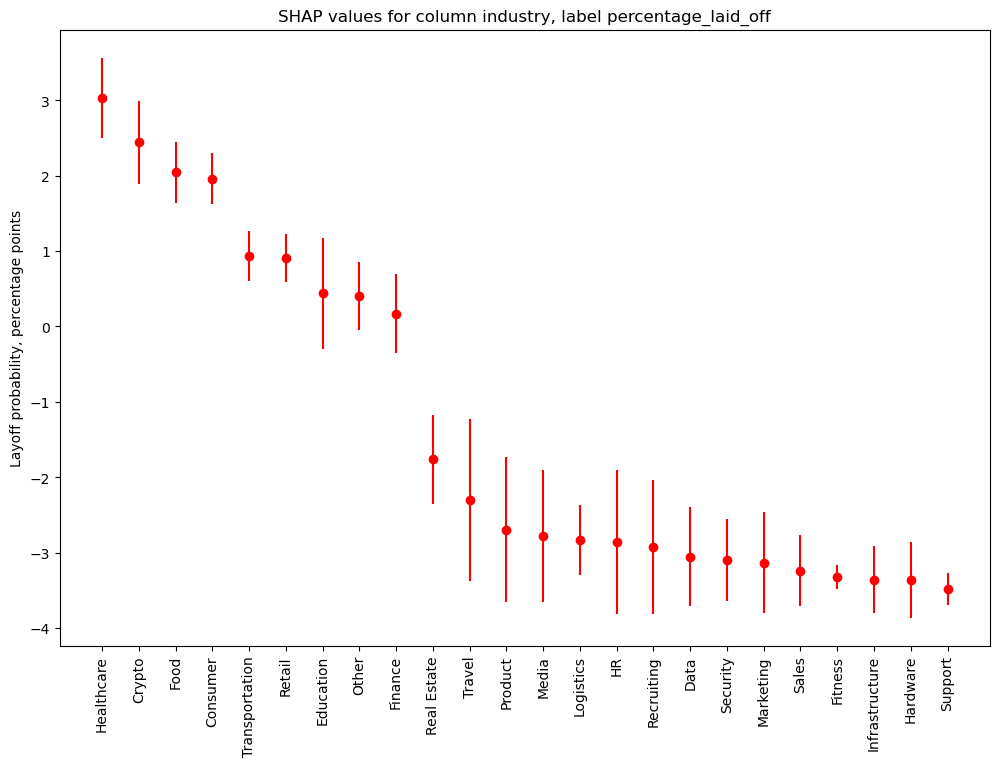

                  gain  gain_std  count
col                                    
Healthcare      3.0303    0.5361     71
Crypto          2.4415    0.5497     49
Food            2.0431    0.3995     41
Consumer        1.9584    0.3356     34
Transportation  0.9371    0.3311     46
Retail          0.9052    0.3160     63
Education       0.4397    0.7390     24
Other           0.4025    0.4484     79
Finance         0.1710    0.5237     90
Real Estate    -1.7644    0.5866     35
Travel         -2.3051    1.0732      8
Product        -2.6941    0.9644     10
Media          -2.7796    0.8716     32
Logistics      -2.8321    0.4668     15
HR             -2.8607    0.9557     18
Recruiting     -2.9298    0.8883      9
Data           -3.0537    0.6595     26
Security       -3.0997    0.5438     43
Marketing      -3.1319    0.6677     50
Sales          -3.2403    0.4692     19
Fitness        -3.3175    0.1592      7
Infrastructure -3.3586    0.4427     10
Hardware       -3.3609    0.5001      7


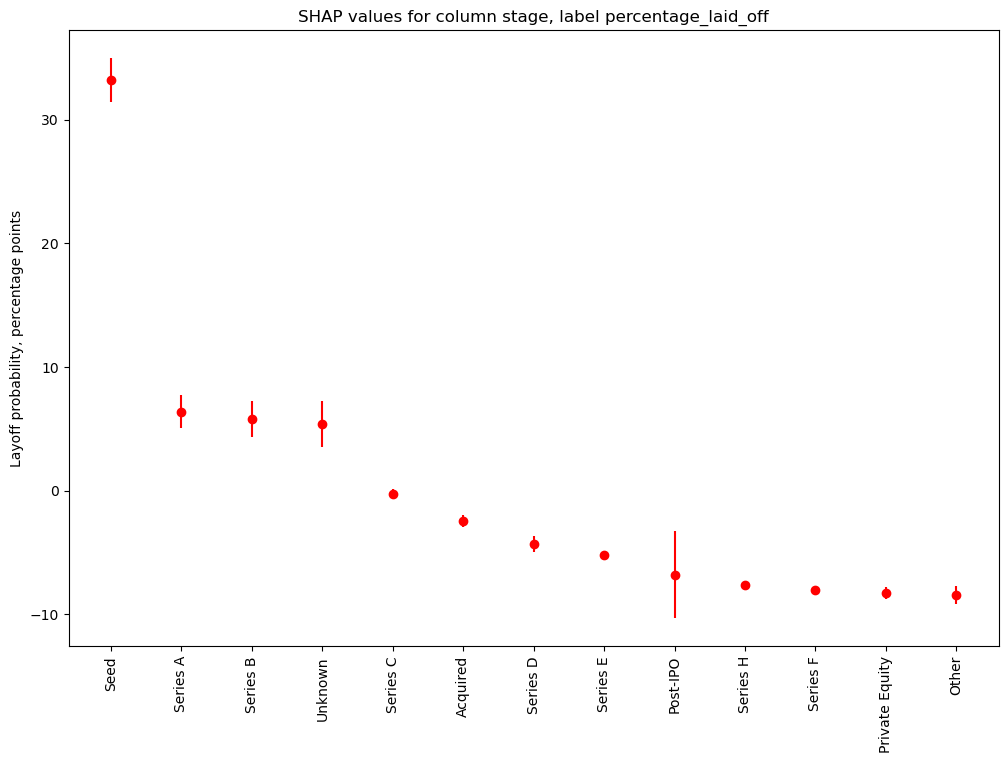

                   gain  gain_std  count
col                                     
Seed            33.2063    1.7645     27
Series A         6.3709    1.3259     54
Series B         5.7806    1.4271     89
Unknown          5.3990    1.8777    120
Series C        -0.2400    0.3939     90
Acquired        -2.4678    0.4996     47
Series D        -4.3138    0.6095     71
Series E        -5.1761    0.3001     44
Post-IPO        -6.8036    3.5095    193
Series H        -7.6666    0.1634      9
Series F        -8.0528    0.2213     25
Private Equity  -8.2737    0.4818     13
Other           -8.4051    0.7288     16

country



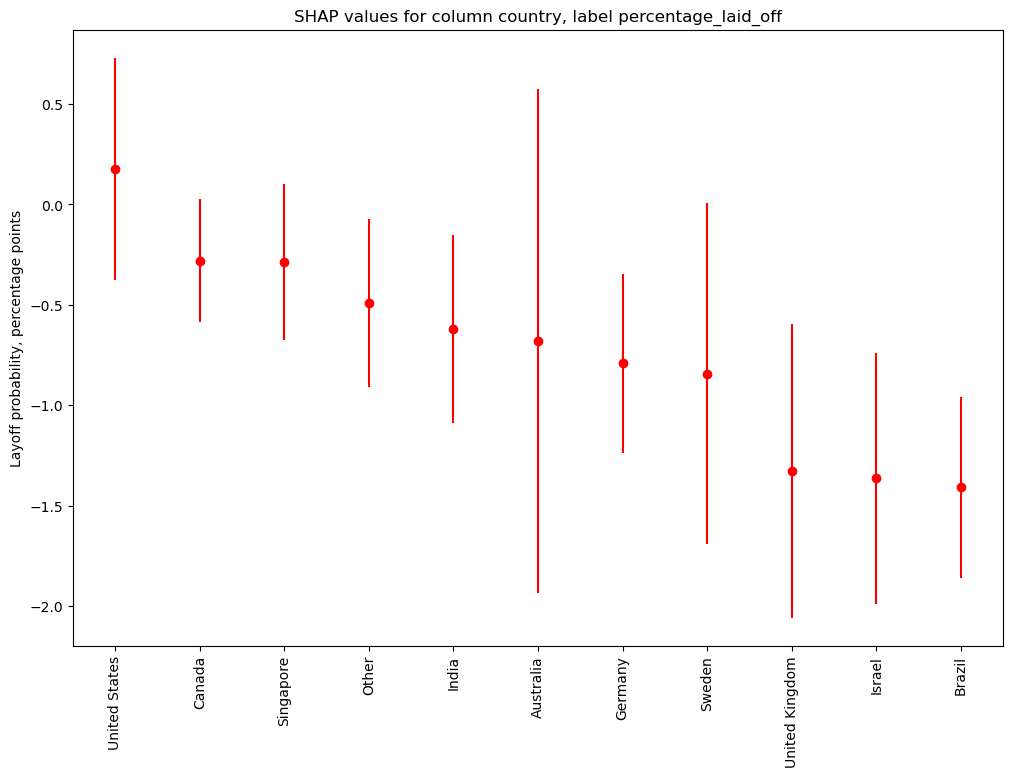

                  gain  gain_std  count
col                                    
United States   0.1769    0.5535    508
Canada         -0.2812    0.3061     35
Singapore      -0.2869    0.3891      8
Other          -0.4915    0.4196     65
India          -0.6230    0.4680     53
Australia      -0.6820    1.2550     21
Germany        -0.7907    0.4452     27
Sweden         -0.8433    0.8505      8
United Kingdom -1.3263    0.7318     29
Israel         -1.3648    0.6230     24
Brazil         -1.4095    0.4494     20

funds_raised



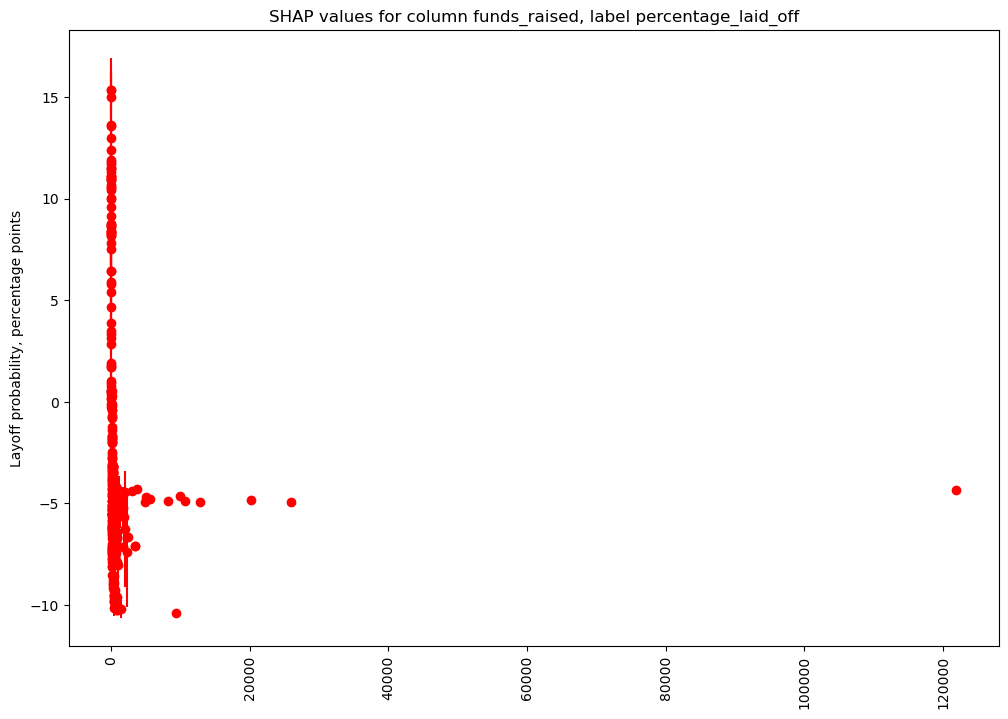

           gain  gain_std  count
col                             
3.0     15.3694    0.9591      4
1.0     15.3471    0.7743      3
5.0     15.0139       NaN      1
4.0     13.5974    0.8752      3
2.0     13.5845    3.3344      7
...         ...       ...    ...
1500.0 -10.2053    0.4447      2
965.0  -10.2238       NaN      1
864.0  -10.2356       NaN      1
814.0  -10.2610       NaN      1
9400.0 -10.3827       NaN      1

[393 rows x 3 columns]


In [63]:
# 循环遍历特征
for col in X_test.columns:  # 遍历 X_test 中的每一列（即每个特征）
    print()
    print(col)
    print()
    show_shap(col, shap_values, label=main_label, X_test=X_test)   # 调用 show_shap 函数来显示和分析该特征的 SHAP 值

我们前面假设公司裁员概率的最重要特征是公司融资阶段、行业和总部位置。

现在依次对这些特征进行分析。

关于公司融资阶段，毫不奇怪，我们发现最高的裁员概率与种子阶段相关，其次是A轮和B 轮融资阶段。

关于公司行业，我们发现裁员概率最高的是加密货币、医疗保健和医疗健康。另一方面，数据、媒体和基础建设行业迄今为止受到的影响似乎最小。

最后，关于公司总部所在地，值得注意的是，我们发现西雅图、旧金山湾区和芝加哥市的裁员概率最高。